# **Predicting Housing-Prices using Linear Regression in PyTorch**

### Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load the dataset

In [18]:
data = pd.read_csv("HousingData.csv")
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


### Handle missing values

In [3]:
data.ffill(inplace=True)

In [20]:
data = data.dropna()

### Check for duplicates

In [21]:
duplicates = data.duplicated().sum()

In [22]:
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    data = data.drop_duplicates()


Number of duplicate rows: 0


In [23]:
print("\nData types before conversion:")
print(data.dtypes)


Data types before conversion:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


### Split the data into features and target variable

In [24]:
X = data.drop('MEDV', axis=1)  
y = data['MEDV']

### Scale the features

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data into training and testing sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Convert data to PyTorch tensors

In [28]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):  
        super(LinearRegressionModel, self).__init__()  
        self.linear = nn.Linear(input_size, output_size)  

    def forward(self, x):
        return self.linear(x) 

### Create the model

In [8]:
model = LinearRegressionModel(X_train.shape[1], 1)

In [9]:
model = LinearRegressionModel(X_train.shape[1], 1)

### Define loss function and optimizer

In [10]:
ccriterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [13]:
criterion = nn.MSELoss()

In [14]:
losses = []
num_epochs = 500
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())  # Store the loss value

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 95.0038
Epoch [100/500], Loss: 32.9307
Epoch [150/500], Loss: 24.4044
Epoch [200/500], Loss: 22.9938
Epoch [250/500], Loss: 22.6239
Epoch [300/500], Loss: 22.4480
Epoch [350/500], Loss: 22.3327
Epoch [400/500], Loss: 22.2491
Epoch [450/500], Loss: 22.1863
Epoch [500/500], Loss: 22.1382


### Plotting the training loss over epochs

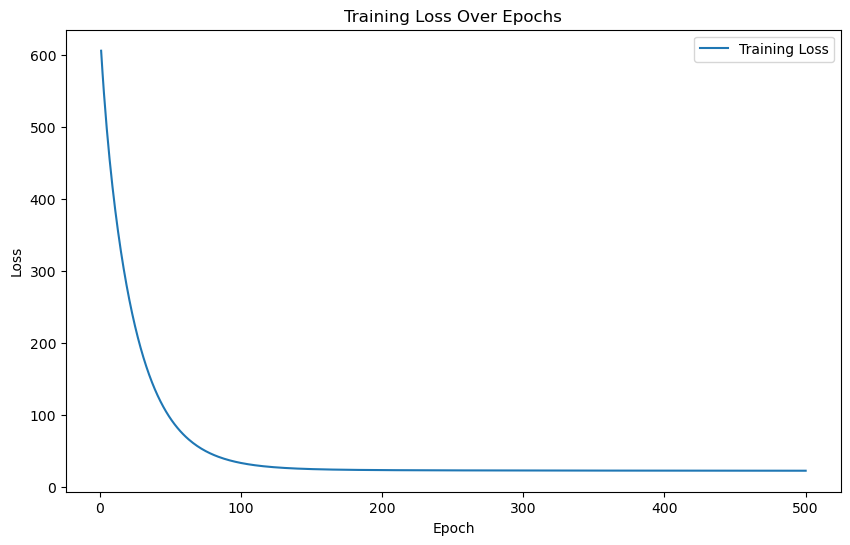

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

### Evaluate on the test set

In [16]:
model.eval() 
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

y_pred_np = y_pred.numpy().flatten()
y_test_np = y_test_tensor.numpy().flatten()
mse = mean_squared_error(y_test_np, y_pred_np)
mae = mean_absolute_error(y_test_np, y_pred_np)
r2 = r2_score(y_test_np, y_pred_np)
print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Test Loss: 25.4464
MSE: 25.4464
MAE: 3.2034
R-squared: 0.6530


### Plot predicted vs actual values

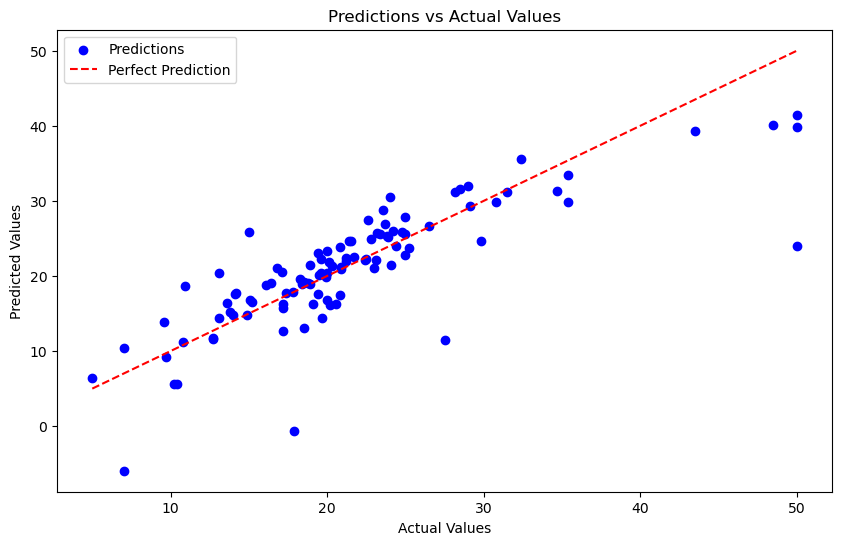

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred_np, color='blue', label='Predictions')
plt.plot([min(y_test_np), max(y_test_np)], [min(y_test_np), max(y_test_np)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()